In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:
from fastai.vision import *

In [22]:
root_path = 'C:/Users/DEEPAK/Desktop/shreyas projects/data science/balls classifier'

In [23]:
proj_path = 'C:/Users/DEEPAK/Desktop/shreyas projects/data science/balls classifier/Balls'

In [24]:
p_path = Path(proj_path)
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4, bs= 16).normalize(imagenet_stats)



In [25]:
data.classes

['basketball', 'cricket', 'football', 'tennis']

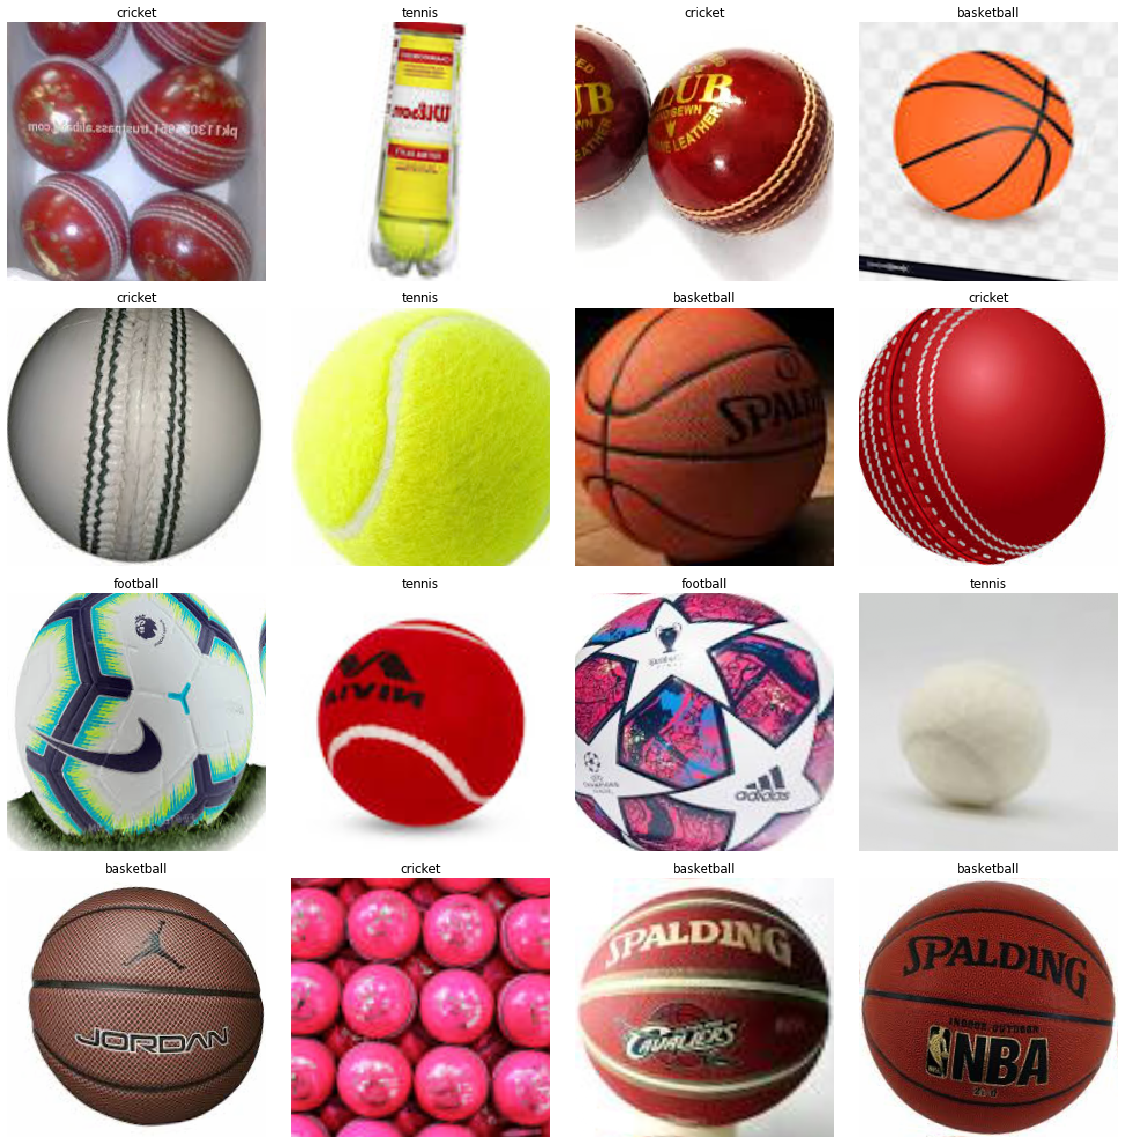

In [26]:
data.show_batch(row = 3 ,fig_size = (7, 8))

In [27]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['basketball', 'cricket', 'football', 'tennis'], 4, 39, 9)

In [28]:
classifier = cnn_learner(data, models.resnet34, metrics = error_rate)

In [29]:
classifier.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,2.379174,0.885237,0.555556,03:55
1,1.640589,0.145348,0.111111,00:42


In [30]:
classifier.save('model2_4', return_path = True)

WindowsPath('C:/Users/DEEPAK/Desktop/shreyas projects/data science/balls classifier/Balls/models/model2_4.pth')

In [13]:
classifier.unfreeze()

In [15]:
classifier.lr_find()
classifier.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 

In [31]:
classifier.load('model2_4')
interp = ClassificationInterpretation.from_learner(classifier)

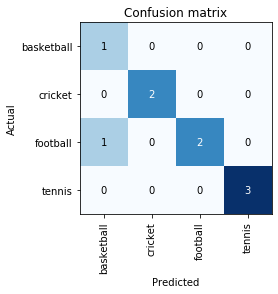

In [32]:
interp.plot_confusion_matrix()

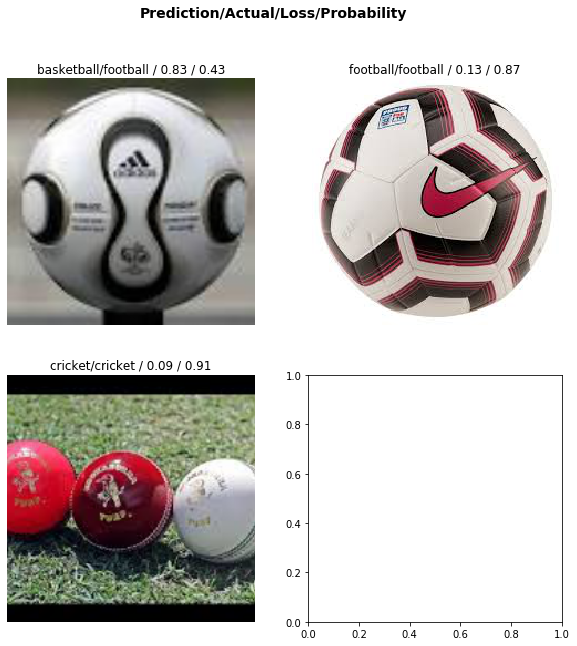

In [33]:
interp.plot_top_losses(3, figsize = (10, 10) )

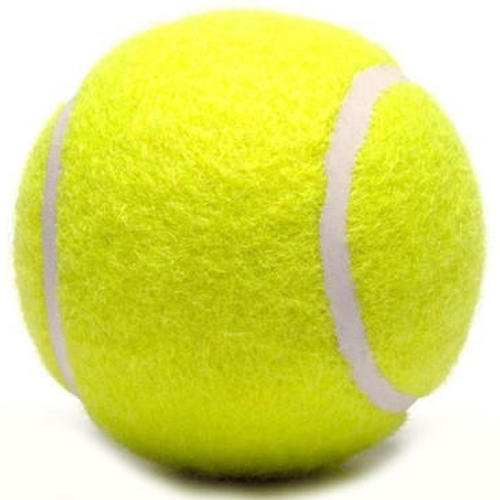

In [34]:
img_cricket= open_image(Path(proj_path)/'cricket'/'tennis.jpg')
img_cricket

In [35]:
pred_class,pred_idx,outputs = classifier.predict(img_cricket)
pred_class

Category tennis